# Nonlinear Benchmark Workshop Datasets

> Fill in a module description here

In [ ]:
#| default_exp datasets.workshop

In [ ]:
#| export
from identibench.utils import *
import identibench.benchmark as idb
import identibench.metrics
import nonlinear_benchmarks
from nonlinear_benchmarks.utilities import Input_output_data
from pathlib import Path
import shutil

In [ ]:
#| hide
import matplotlib.pyplot as plt

In [ ]:
tmp_dir = idb.get_default_data_root()

## Wiener Hammerstein Dataset

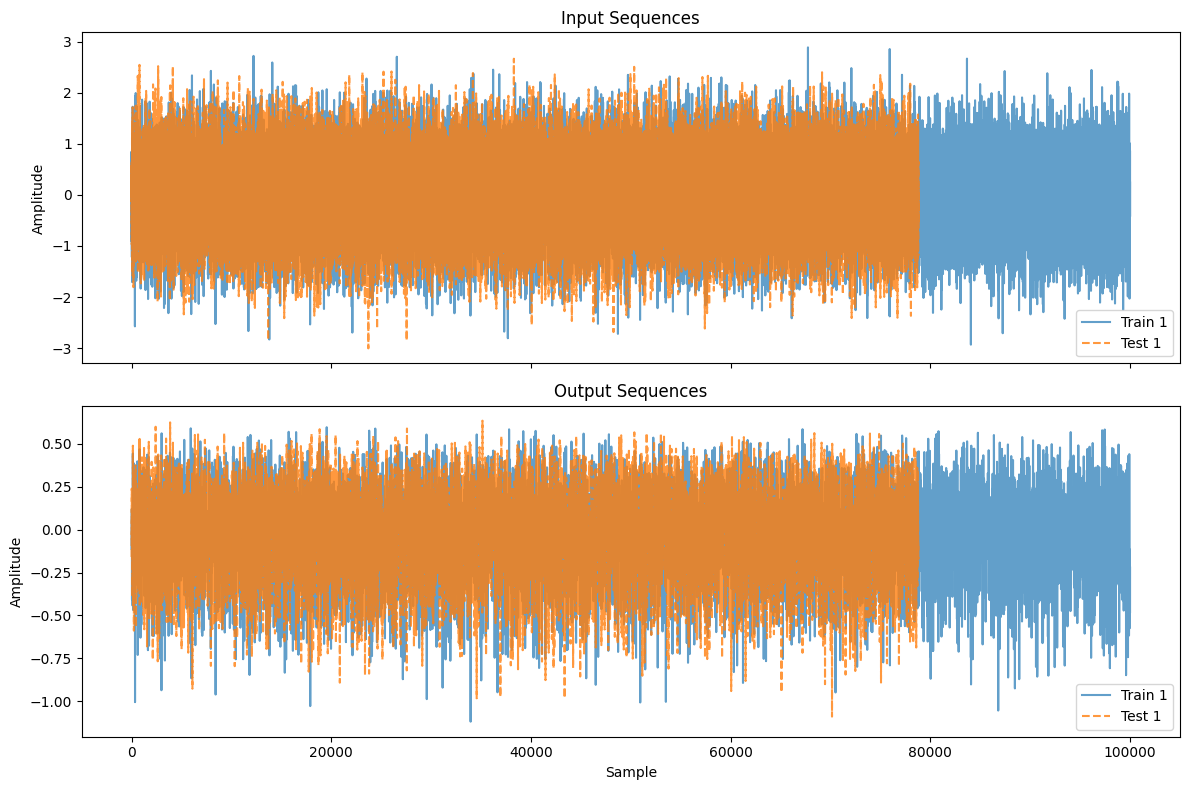

In [ ]:
def plot_workshop_data(dataset_function,max_sequences=3):
    train_val, test = dataset_function(always_return_tuples_of_datasets=True)
    fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
    # Plot training/validation data
    for i, data in enumerate(train_val[:max_sequences]):
        axs[0].plot(data.u, alpha=0.7, label=f'Train {i+1}')
        axs[1].plot(data.y, alpha=0.7, label=f'Train {i+1}')

    # Plot test data
    for i, data in enumerate(test[:max_sequences]):
        axs[0].plot(data.u, ls='--', alpha=0.8, label=f'Test {i+1}')
        axs[1].plot(data.y, ls='--', alpha=0.8, label=f'Test {i+1}')

    axs[0].set_title('Input Sequences')
    axs[0].set_ylabel('Amplitude')
    axs[0].legend()

    axs[1].set_title('Output Sequences')
    axs[1].set_xlabel('Sample')
    axs[1].set_ylabel('Amplitude')
    axs[1].legend()

    plt.tight_layout()
plot_workshop_data(nonlinear_benchmarks.WienerHammerBenchMark)

In [ ]:
#| export
def wiener_hammerstein(
        save_path: Path, #directory the files are written to, created if it does not exist
        force_download: bool = False, # force download the dataset
        save_train_valid: bool = True, # save unsplitted train and valid datasets in 'train_valid' subdirectory
        split_idx: int = 80_000 # split index for train and valid datasets
):
    train_val, test = nonlinear_benchmarks.WienerHammerBenchMark(force_download=force_download)
    train = train_val[:split_idx]
    valid = train_val[split_idx:]

    dataset_to_hdf5(train,valid,test,save_path,train_valid=(train_val if save_train_valid else None))

In [ ]:
wiener_hammerstein(tmp_dir / 'wh' )
wiener_hammerstein(tmp_dir / 'wh' ,save_train_valid=False)

In [ ]:
#| export
BenchmarkWH_Simulation = idb.BenchmarkSpecSimulation(
    name='BenchmarkWH_Simulation', dataset_id='wh',
    u_cols=['u0'], y_cols=['y0'], metric_func=identibench.metrics.rmse, 
    download_func=wiener_hammerstein,
    init_window=100
)
BenchmarkWH_Prediction = idb.BenchmarkSpecPrediction(
    name='BenchmarkWH_Prediction', dataset_id='wh',
    u_cols=['u0'], y_cols=['y0'], metric_func=identibench.metrics.rmse, 
    download_func=wiener_hammerstein,
    init_window=100, pred_horizon=100, pred_step=100
)

In [ ]:
idb.run_benchmark(
    spec=BenchmarkWH_Simulation, 
    build_model=idb._dummy_build_model
)

Building model with spec: BenchmarkWH_Simulation, seed: 3737589499


{'benchmark_name': 'BenchmarkWH_Simulation',
 'dataset_id': 'wh',
 'hyperparameters': {},
 'seed': 3737589499,
 'training_time_seconds': 1.608299498911947e-05,
 'test_time_seconds': 0.0012776670046150684,
 'benchmark_type': 'BenchmarkSpecSimulation',
 'metric_score': 0.24715164901247905}

In [ ]:
idb.run_benchmark(
    spec=BenchmarkWH_Prediction, 
    build_model=idb._dummy_build_model
)

Building model with spec: BenchmarkWH_Prediction, seed: 3228153830


{'benchmark_name': 'BenchmarkWH_Prediction',
 'dataset_id': 'wh',
 'hyperparameters': {},
 'seed': 3228153830,
 'training_time_seconds': 5.804101238027215e-05,
 'test_time_seconds': 0.0020238750003045425,
 'benchmark_type': 'BenchmarkSpecPrediction',
 'metric_score': 0.24715164901247905}

## Silverbox Dataset

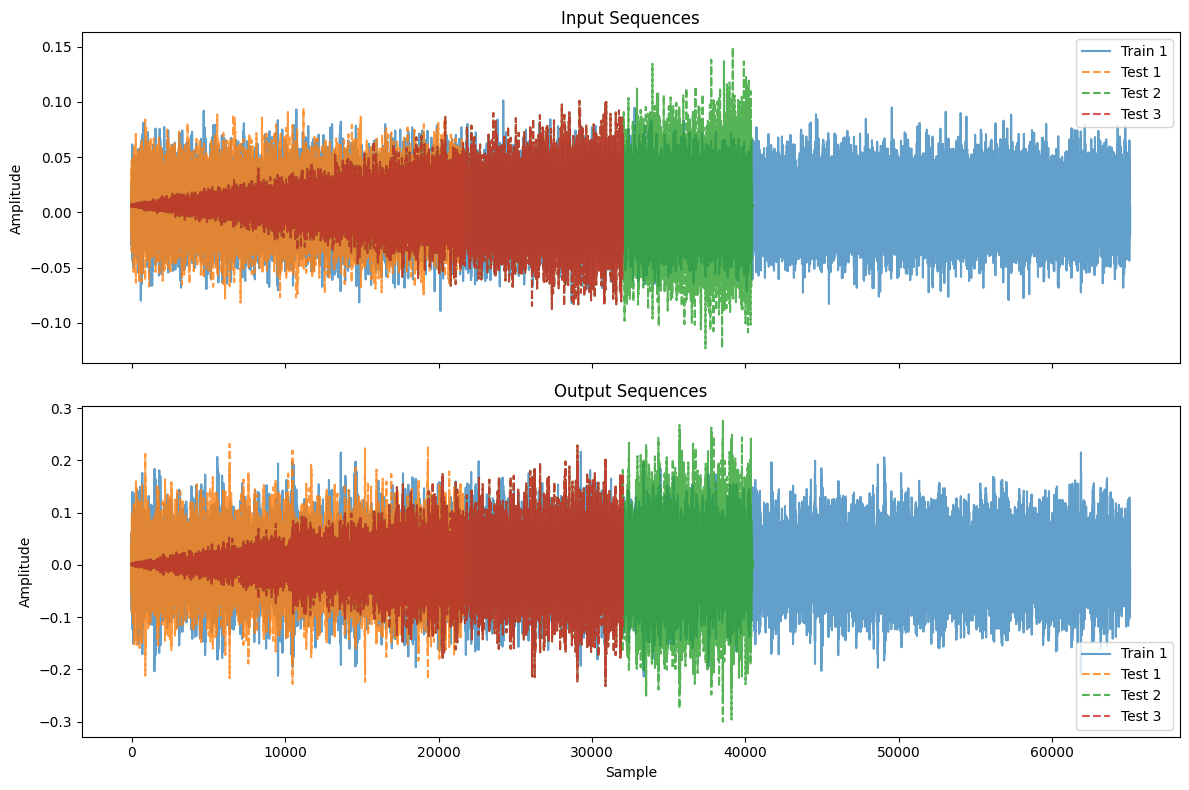

In [ ]:
plot_workshop_data(nonlinear_benchmarks.Silverbox)

In [ ]:
#| export
def silverbox(
        save_path: Path, #directory the files are written to, created if it does not exist
        force_download: bool = False, # force download the dataset
        save_train_valid: bool = True, # save unsplitted train and valid datasets in 'train_valid' subdirectory
        split_idx: int = 50_000 # split index for train and valid datasets
):
    train_val, test = nonlinear_benchmarks.Silverbox(force_download=force_download)
    train = train_val[:split_idx]
    valid = train_val[split_idx:]

    dataset_to_hdf5(train,valid,test,save_path,train_valid=(train_val if save_train_valid else None))

In [ ]:
silverbox(tmp_dir / 'silverbox')

In [ ]:
#| export
BenchmarkSilverbox_Simulation = idb.BenchmarkSpecSimulation(
    name='BenchmarkSilverbox_Simulation', dataset_id='silverbox',
    u_cols=['u0'], y_cols=['y0'], metric_func=identibench.metrics.rmse, 
    download_func=silverbox,
    init_window=100
)
BenchmarkSilverbox_Prediction = idb.BenchmarkSpecPrediction(
    name='BenchmarkSilverbox_Prediction', dataset_id='silverbox',
    u_cols=['u0'], y_cols=['y0'], metric_func=identibench.metrics.rmse, 
    download_func=silverbox,
    init_window=100, pred_horizon=100, pred_step=100
)

In [ ]:
idb.run_benchmark(
    spec=BenchmarkSilverbox_Simulation, 
    build_model=idb._dummy_build_model
)

Building model with spec: BenchmarkSilverbox_Simulation, seed: 228319720


{'benchmark_name': 'BenchmarkSilverbox_Simulation',
 'dataset_id': 'silverbox',
 'hyperparameters': {},
 'seed': 228319720,
 'training_time_seconds': 1.8749997252598405e-05,
 'test_time_seconds': 0.0021969579975120723,
 'benchmark_type': 'BenchmarkSpecSimulation',
 'metric_score': 0.050241234773460236}

In [ ]:
idb.run_benchmark(
    spec=BenchmarkSilverbox_Prediction, 
    build_model=idb._dummy_build_model
)

Building model with spec: BenchmarkSilverbox_Prediction, seed: 1671264151


{'benchmark_name': 'BenchmarkSilverbox_Prediction',
 'dataset_id': 'silverbox',
 'hyperparameters': {},
 'seed': 1671264151,
 'training_time_seconds': 0.00011774999438785017,
 'test_time_seconds': 0.0012262079981155694,
 'benchmark_type': 'BenchmarkSpecPrediction',
 'metric_score': 0.050241234773460236}

## Cascaded Tanks Dataset

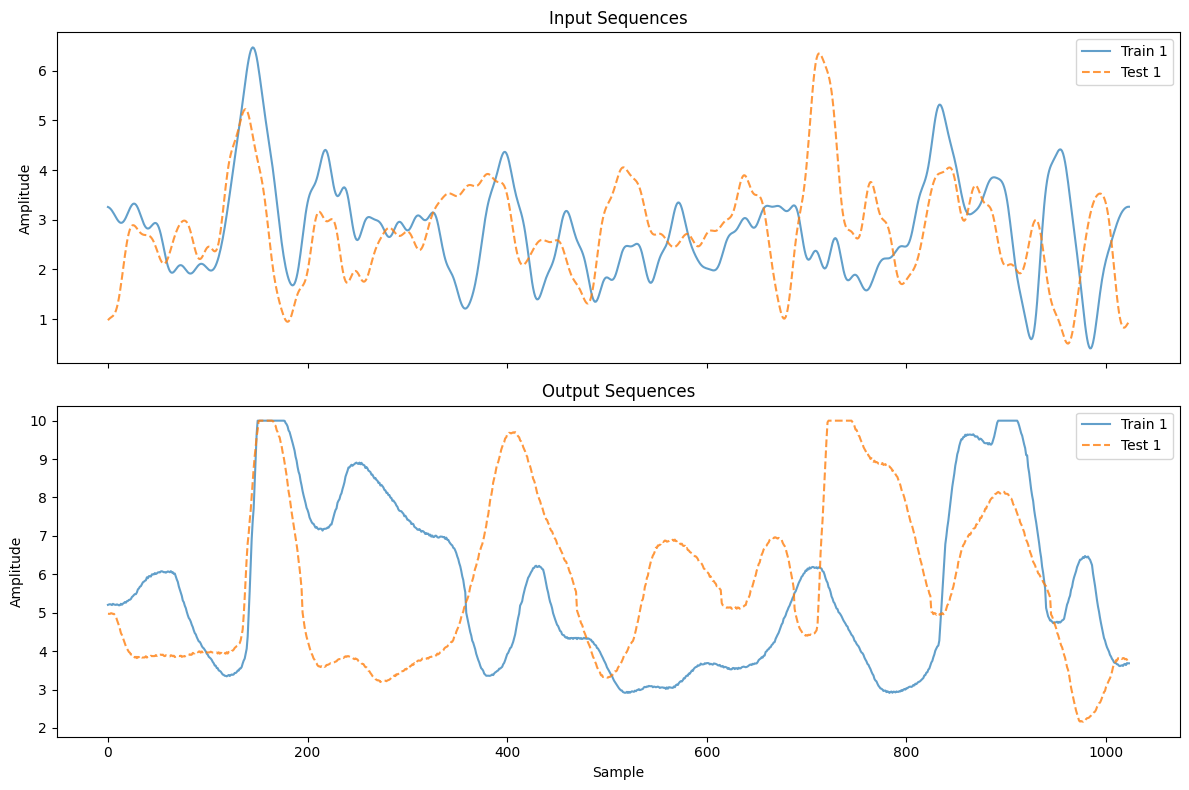

In [ ]:
plot_workshop_data(nonlinear_benchmarks.Cascaded_Tanks) 

In [ ]:
#| export
def cascaded_tanks(
        save_path: Path, #directory the files are written to, created if it does not exist
        force_download: bool = False, # force download the dataset
        save_train_valid: bool = True, # save unsplitted train and valid datasets in 'train_valid' subdirectory
        split_idx: int = 160 # split index for train and valid datasets
):
    train_val, test = nonlinear_benchmarks.Cascaded_Tanks(force_download=force_download)
    train = train_val[split_idx:]
    valid = train_val[:split_idx]

    dataset_to_hdf5(train,valid,test,save_path,train_valid=(train_val if save_train_valid else None))

In [ ]:
cascaded_tanks(tmp_dir  / 'cascaded_tanks' )

In [ ]:
#| export
BenchmarkCascadedTanks_Simulation = idb.BenchmarkSpecSimulation(
    name='BenchmarkCascadedTanks_Simulation', dataset_id='cascaded_tanks',
    u_cols=['u0'], y_cols=['y0'], metric_func=identibench.metrics.rmse, 
    download_func=cascaded_tanks,
    init_window=100
)
BenchmarkCascadedTanks_Prediction = idb.BenchmarkSpecPrediction(
    name='BenchmarkCascadedTanks_Prediction', dataset_id='cascaded_tanks',
    u_cols=['u0'], y_cols=['y0'], metric_func=identibench.metrics.rmse, 
    download_func=cascaded_tanks,
    init_window=100, pred_horizon=100, pred_step=100
)

In [ ]:
idb.run_benchmark(
    spec=BenchmarkCascadedTanks_Simulation, 
    build_model=idb._dummy_build_model
)

Building model with spec: BenchmarkCascadedTanks_Simulation, seed: 2692797777


{'benchmark_name': 'BenchmarkCascadedTanks_Simulation',
 'dataset_id': 'cascaded_tanks',
 'hyperparameters': {},
 'seed': 2692797777,
 'training_time_seconds': 3.02909902529791e-05,
 'test_time_seconds': 0.0010509999992791563,
 'benchmark_type': 'BenchmarkSpecSimulation',
 'metric_score': 6.108539811353397}

In [ ]:
idb.run_benchmark(
    spec=BenchmarkCascadedTanks_Prediction, 
    build_model=idb._dummy_build_model
)

Building model with spec: BenchmarkCascadedTanks_Prediction, seed: 256453610


{'benchmark_name': 'BenchmarkCascadedTanks_Prediction',
 'dataset_id': 'cascaded_tanks',
 'hyperparameters': {},
 'seed': 256453610,
 'training_time_seconds': 1.5832993085496128e-05,
 'test_time_seconds': 0.0008561659924453124,
 'benchmark_type': 'BenchmarkSpecPrediction',
 'metric_score': 6.108539811353397}

## EMPS Dataset

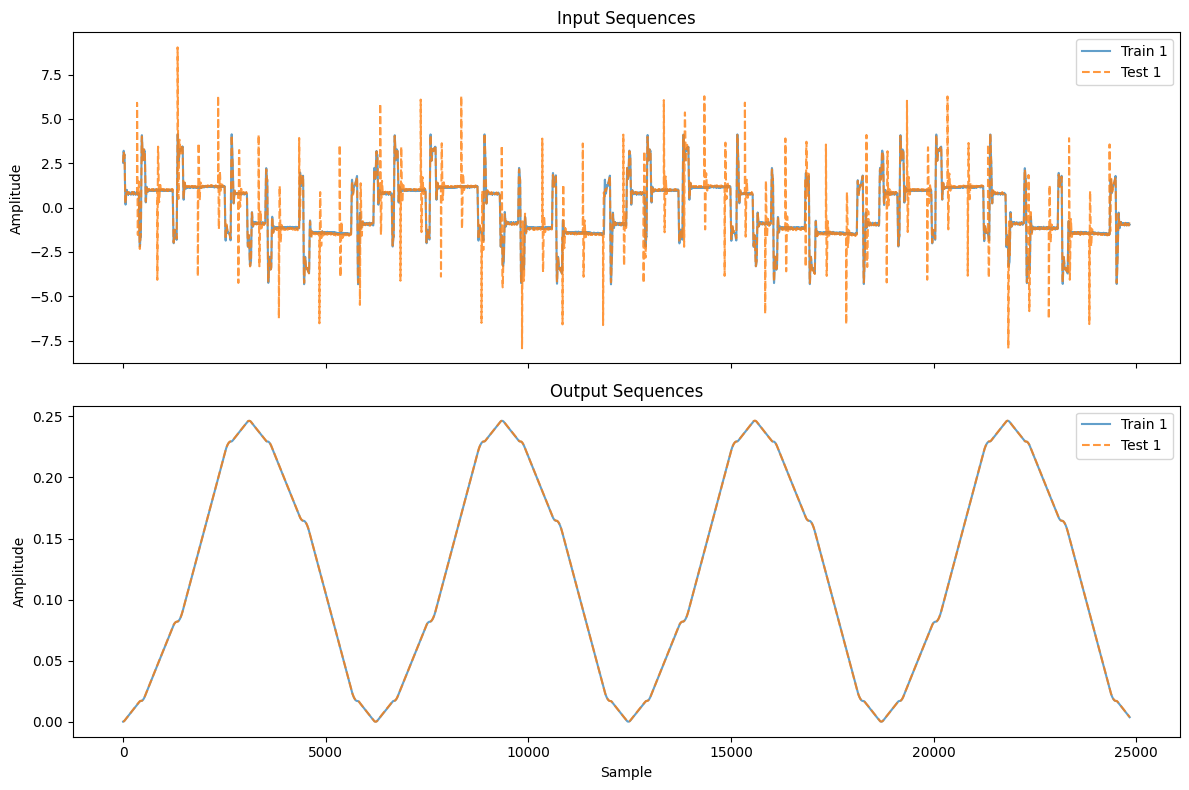

In [ ]:
plot_workshop_data(nonlinear_benchmarks.EMPS)

In [ ]:
#| export
def emps(
        save_path: Path, #directory the files are written to, created if it does not exist
        force_download: bool = False, # force download the dataset
        save_train_valid: bool = True, # save unsplitted train and valid datasets in 'train_valid' subdirectory
        split_idx: int = 18_000 # split index for train and valid datasets
):
    train_val, test = nonlinear_benchmarks.EMPS(force_download=force_download)
    train = train_val[:split_idx]
    valid = train_val[split_idx:]

    dataset_to_hdf5(train,valid,test,save_path,train_valid=(train_val if save_train_valid else None))

In [ ]:
emps(tmp_dir  / 'emps')

In [ ]:
#| export
BenchmarkEMPS_Simulation = idb.BenchmarkSpecSimulation(
    name='BenchmarkEMPS_Simulation', dataset_id='emps',
    u_cols=['u0'], y_cols=['y0'], metric_func=identibench.metrics.rmse, 
    download_func=emps,
    init_window=100
)
BenchmarkEMPS_Prediction = idb.BenchmarkSpecPrediction(
    name='BenchmarkEMPS_Prediction', dataset_id='emps',
    u_cols=['u0'], y_cols=['y0'], metric_func=identibench.metrics.rmse, 
    download_func=emps,
    init_window=100, pred_horizon=100, pred_step=100
)

In [ ]:
idb.run_benchmark(
    spec=BenchmarkEMPS_Simulation, 
    build_model=idb._dummy_build_model
)

Building model with spec: BenchmarkEMPS_Simulation, seed: 4274976261


{'benchmark_name': 'BenchmarkEMPS_Simulation',
 'dataset_id': 'emps',
 'hyperparameters': {},
 'seed': 4274976261,
 'training_time_seconds': 1.95419997908175e-05,
 'test_time_seconds': 0.0010205830039922148,
 'benchmark_type': 'BenchmarkSpecSimulation',
 'metric_score': 0.1488851223140397}

In [ ]:
idb.run_benchmark(
    spec=BenchmarkEMPS_Prediction, 
    build_model=idb._dummy_build_model
)

Building model with spec: BenchmarkEMPS_Prediction, seed: 1714808738


{'benchmark_name': 'BenchmarkEMPS_Prediction',
 'dataset_id': 'emps',
 'hyperparameters': {},
 'seed': 1714808738,
 'training_time_seconds': 5.1709008403122425e-05,
 'test_time_seconds': 0.001139290994615294,
 'benchmark_type': 'BenchmarkSpecPrediction',
 'metric_score': 0.1488851223140397}

## Noisy Wiener Hammerstein

In [ ]:
#| export
from scipy.io import loadmat
def noisy_wh(
        save_path: Path, #directory the files are written to, created if it does not exist
        force_download: bool = False, # force download the dataset
        save_train_valid: bool = True # save unsplitted train and valid datasets in 'train_valid' subdirectory
):
    'the wiener hammerstein dataset with process noise'

    #extract raw .mat files, to preserve filenames necessary for train, valid split
    matfiles = nonlinear_benchmarks.not_splitted_benchmarks.WienerHammerstein_Process_Noise(data_file_locations=True,train_test_split=False,force_download=force_download)

    for file in matfiles:
        f_path = Path(file)
        save_path = Path(save_path)

        if 'Test' in f_path.stem:
            hdf_path = save_path / 'test'
        elif 'Combined' in f_path.stem:
            hdf_path = save_path / 'valid'
        else:
            hdf_path = save_path / 'train'

        out = loadmat(f_path)
        _,u,y,fs = out['dataMeas'][0,0]
        fs = fs[0,0]
        for idx,(ui,yi) in enumerate(zip(u.T,y.T)):
            iodata = Input_output_data(u=ui,y=yi, sampling_time=1/fs)
            fname = f'{f_path.stem}_{idx+1}'
            iodata_to_hdf5(iodata,hdf_path,fname)
    if save_train_valid:
        #copy train and valid files to train_valid directory
        for d in ['train','valid']:
            for f in (Path(save_path)/d).glob('*.hdf5') :
                shutil.copy2(f, (p:=Path(save_path)/'train_valid').mkdir(exist_ok=True) or p)


In [ ]:
noisy_wh(tmp_dir / 'noisy_wh' )

In [ ]:
#| export
BenchmarkNoisyWH_Simulation = idb.BenchmarkSpecSimulation(
    name='BenchmarkNoisyWH_Simulation', dataset_id='noisy_wh',
    u_cols=['u0'], y_cols=['y0'], metric_func=identibench.metrics.rmse, 
    download_func=noisy_wh,
    init_window=100
)
BenchmarkNoisyWH_Prediction = idb.BenchmarkSpecPrediction(
    name='BenchmarkNoisyWH_Prediction', dataset_id='noisy_wh',
    u_cols=['u0'], y_cols=['y0'], metric_func=identibench.metrics.rmse, 
    download_func=noisy_wh,
    init_window=100, pred_horizon=100, pred_step=100
)

In [ ]:
idb.run_benchmark(
    spec=BenchmarkNoisyWH_Simulation, 
    build_model=idb._dummy_build_model
)

Building model with spec: BenchmarkNoisyWH_Simulation, seed: 3048163616


{'benchmark_name': 'BenchmarkNoisyWH_Simulation',
 'dataset_id': 'noisy_wh',
 'hyperparameters': {},
 'seed': 3048163616,
 'training_time_seconds': 0.00021320799714885652,
 'test_time_seconds': 0.001282166995224543,
 'benchmark_type': 'BenchmarkSpecSimulation',
 'metric_score': 0.10422994425640283}

In [ ]:
idb.run_benchmark(
    spec=BenchmarkNoisyWH_Prediction, 
    build_model=idb._dummy_build_model
)

Building model with spec: BenchmarkNoisyWH_Prediction, seed: 2263054758


{'benchmark_name': 'BenchmarkNoisyWH_Prediction',
 'dataset_id': 'noisy_wh',
 'hyperparameters': {},
 'seed': 2263054758,
 'training_time_seconds': 1.4165998436510563e-05,
 'test_time_seconds': 0.0014057079970370978,
 'benchmark_type': 'BenchmarkSpecPrediction',
 'metric_score': 0.10422994425640283}

## Parallel Wienerhammerstein

In [ ]:
#ToDo

## F16

In [ ]:
#ToDo

## Coupled Electric Drives

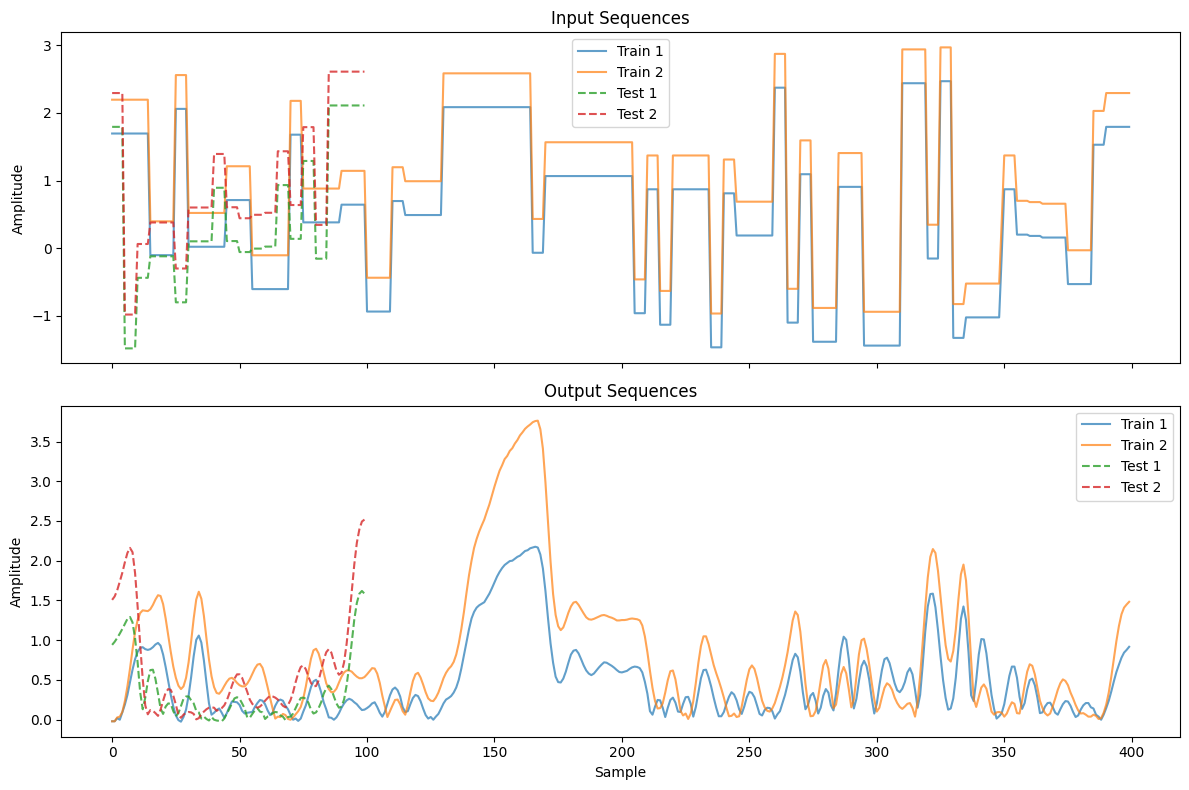

In [ ]:
plot_workshop_data(nonlinear_benchmarks.CED)

In [ ]:
#| export
def ced(
        save_path: Path, #directory the files are written to, created if it does not exist
        force_download: bool = False, # force download the dataset
        save_train_valid: bool = True, # save unsplitted train and valid datasets in 'train_valid' subdirectory
        split_idx: int = 300 # split index for train and valid datasets
):
    train_val, test = nonlinear_benchmarks.CED(force_download=force_download,always_return_tuples_of_datasets=True)
    train = tuple(x[:split_idx] for x in train_val)
    valid = tuple(x[split_idx:] for x in train_val)

    dataset_to_hdf5(train,valid,test,save_path,train_valid=(train_val if save_train_valid else None))

In [ ]:
ced(tmp_dir / 'ced' )

In [ ]:
#| export
BenchmarkCED_Simulation = idb.BenchmarkSpecSimulation(
    name='BenchmarkCED_Simulation', dataset_id='ced',
    u_cols=['u0'], y_cols=['y0'], metric_func=identibench.metrics.rmse, 
    download_func=ced,
    init_window=100
)
BenchmarkCED_Prediction = idb.BenchmarkSpecPrediction(
    name='BenchmarkCED_Prediction', dataset_id='ced',
    u_cols=['u0'], y_cols=['y0'], metric_func=identibench.metrics.rmse, 
    download_func=ced,
    init_window=100, pred_horizon=100, pred_step=100
)

In [ ]:
idb.run_benchmark(
    spec=BenchmarkCED_Simulation, 
    build_model=idb._dummy_build_model
)

Building model with spec: BenchmarkCED_Simulation, seed: 3717899522


{'benchmark_name': 'BenchmarkCED_Simulation',
 'dataset_id': 'ced',
 'hyperparameters': {},
 'seed': 3717899522,
 'training_time_seconds': 6.462499732151628e-05,
 'test_time_seconds': 0.0010228330065729097,
 'benchmark_type': 'BenchmarkSpecSimulation',
 'metric_score': 0.7260221917432521}

In [ ]:
idb.run_benchmark(
    spec=BenchmarkCED_Prediction, 
    build_model=idb._dummy_build_model
)

Building model with spec: BenchmarkCED_Prediction, seed: 3698028581


{'benchmark_name': 'BenchmarkCED_Prediction',
 'dataset_id': 'ced',
 'hyperparameters': {},
 'seed': 3698028581,
 'training_time_seconds': 1.9500002963468432e-05,
 'test_time_seconds': 0.000895500008482486,
 'benchmark_type': 'BenchmarkSpecPrediction',
 'metric_score': 0.7260221917432521}

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()